# Support Vector Machine (Large Margin Classification)

## Cost function

$$\min_{\theta} C \sum_{i = 1}^{m} \Big[ y^{(i)} \text{cost}_1\big(\theta^T x^{(i)}\big) + \big(1 - y^{(i)}\big) \text{cost}_0\big(\theta^T x^{(i)}\big) \Big] + \frac{1}{2} \sum_{j = 1}^{n}\theta^2_j$$

In [10]:
# importing required modules
import numpy as np
import matplotlib.pyplot as plt

# some high DPI settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

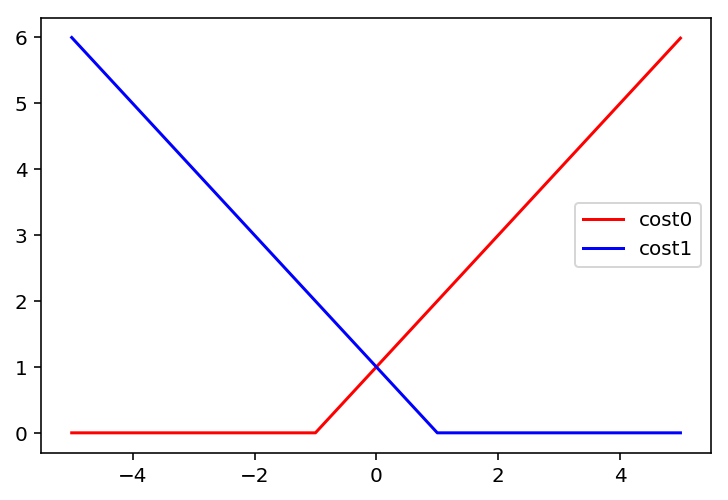

In [33]:
x = np.arange(-5, 5, 0.01)
y = np.sin(x) / x

# cost0-function = {
#      x + 1   if x > -1,
#      0       otherwise
# }
y_cost0 = np.select(
    [ x > -1, x <= -1 ], # cases
    [ x + 1, 0 ]         # values
)

# cost1-function = {
#      -x + 1   if x < 1,
#      0        otherwise
# }
y_cost1 = np.select(
    [ x < 1, x >= 1 ], # cases
    [ -x + 1, 0 ]      # values
)

line0, = plt.plot(x, y_cost0, "r", label="cost0")
line1, = plt.plot(x, y_cost1, "b", label="cost1")
plt.legend(handles=[ line0, line1 ])
plt.show()

<img src="qr-code-to-github-repo.svg" />

<center>https://github.com/NIPE-SYSTEMS/support-vector-machine</center>